In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#4.c Plotting numerical solution of the system

In [186]:
def dxdt(x):
    return np.exp(-x**3 + x**2 + 6*x) - 1
# Define the ODE system

def dxdt_IVP(t,x):
   return np.exp(-x**3 + x**2 +6*x) -1

In [187]:
#Set up
dt = 0.01  # Create time vector 
t_start,t_end = 0, 10

# Create the time vector
t = np.arange(t_start, t_end + dt, dt)
x0_range = np.linspace(-3, 5, 10) # Create range of initial conditions requested at (-3,5). This will be use for later enumeration of 4.d
x0 = 1.0 # Initial condition


I don't which algorithm the question is asking for so I'll just apply all of them. Euler Method seemingly have the worst approximation so there for there is discrepancy with that solution curve vs the rk4 and scipy. The solution is based on I.C x(0)= 1

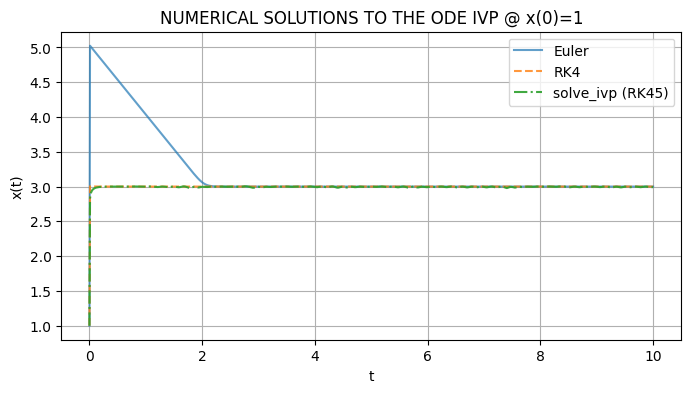

In [193]:
#Eyler's Method
euler = np.zeros_like(t)  # Create a vector of zeros, the same length as the time vector, to be filled with the values of x at each value of t
euler[0] = x0  # Insert initial condition as first value
for j in range(t.shape[0]-1):
    euler[j+1] = euler[j] + dt*dxdt(euler[j])

#Runge-Kutta 4th Order Method
rk4 = np.zeros_like(t)  # Create a vector of zeros, the same length as the time vector, to be filled with the values of x at each value of t
rk4[0] = x0  # Insert initial condition as first value
for j in range(t.shape[0]-1):
    k1 = dt*dxdt(rk4[j])
    k2 = dt*dxdt(rk4[j]+0.5*k1)
    k3 = dt*dxdt(rk4[j]+0.5*k2)
    k4 = dt*dxdt(rk4[j]+k3)
    rk4[j+1] = rk4[j] + 1/6*(k1 + 2*k2 + 2*k3 + k4)
#Solve_ivp Method
from scipy.integrate import solve_ivp       
sol = solve_ivp(dxdt_IVP, [t_start, t_end], [x0], t_eval=t)
x_ivp = sol.y[0]

plt.figure(figsize=(8, 4))
plt.plot(t, euler, label='Euler', alpha=0.7)
plt.plot(t, rk4, '--', label='RK4', alpha=0.8)
plt.plot(t, x_ivp, '-.', label='solve_ivp (RK45)', alpha=0.9)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("NUMERICAL SOLUTIONS TO THE ODE IVP @ x(0)=1")
plt.legend()
plt.grid(True)
plt.show()
 

In [189]:
x_M = np.zeros((len(x0_range), len(t)))  #Vectorized solution matrix this code is given by the example code on bightspace

# Fill the first column of our solution matrix with the initial conditions
x_M[:, 0] = x0_range

# --- Euler Method Loop (Vectorized) ---
# This loop calculates the solution for all initial conditions at once
for j in range(t.shape[0] - 1):
    x_M[:, j+1] = x_M[:, j] + dt * dxdt(x_M[:, j])



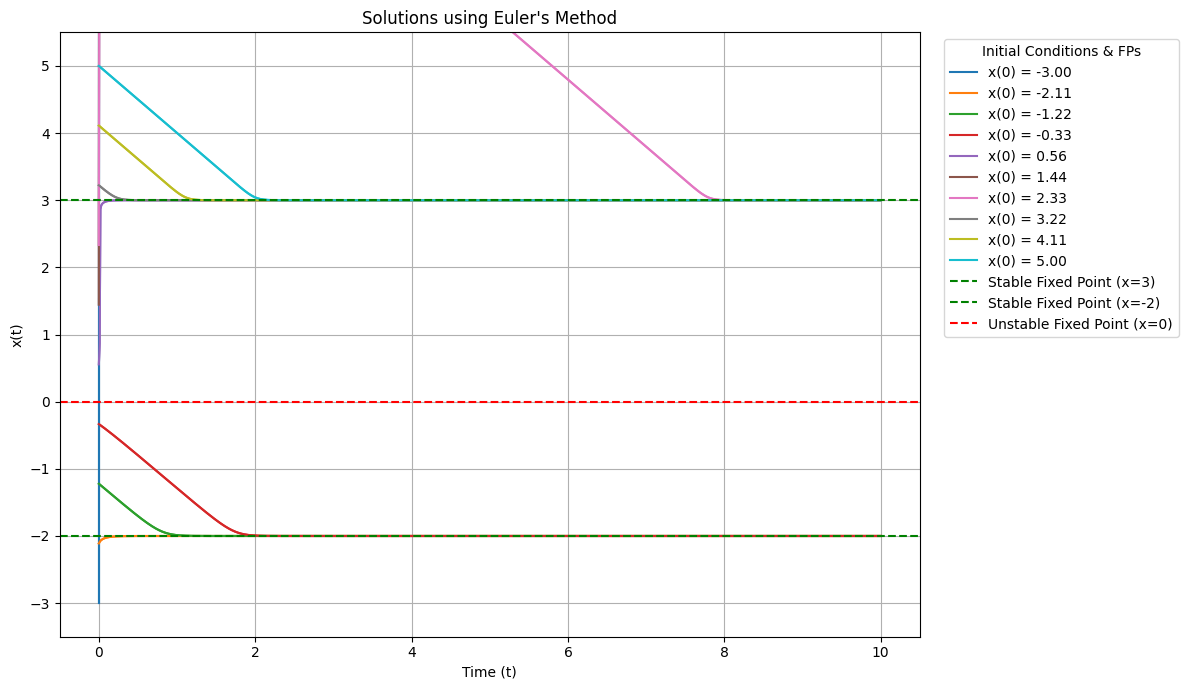

In [ ]:
# --- Plotting the Results ---
plt.figure(figsize=(12, 7))
# The .T transposes the matrix so we can plot each solution (row) easily
plt.plot(t, x_M.T)

for i in range(len(x0_range)):  #
    # Plot the i-th solution (row) with a label corresponding to its initial condition
    plt.plot(t, x_M[i, :], label=f'x(0) = {x0_range[i]:.2f}')     #is the index of the initial condition in x0_range

# Add horizontal lines for the fixed points to compare, from Linear Stability Analysis we know Fpts are at x=-2,0,3 with only 0 being unstable
plt.axhline(y=3, color='g', linestyle='--', label='Stable Fixed Point (x=3)')
plt.axhline(y=-2, color='g', linestyle='--', label='Stable Fixed Point (x=-2)')
plt.axhline(y=0, color='r', linestyle='--', label='Unstable Fixed Point (x=0)')

# Formatting the plot
plt.title("Solutions using Euler's Method")
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.ylim(-3.5, 5.5) # Set y-axis limits to match the previous plot
plt.legend()
plt.grid(True)

plt.legend(title="Initial Conditions & FPs", bbox_to_anchor=(1.02, 1), loc='upper left')


plt.tight_layout()
plt.show()

#Although this isn't a good plot it does show the stability of the fixed points as all initial conditions except x=0 converge to either x=-2 or x=3 which matches our previous analysis
# IDK what up with the greyy line this cases it seem like an overshoot

<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:36: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Loz20\AppData\Local\Temp\ipykernel_31024\1992749816.py:36: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Bifurcation Diagram for $\dot{x} = x^3 + rx^2 + rx$')


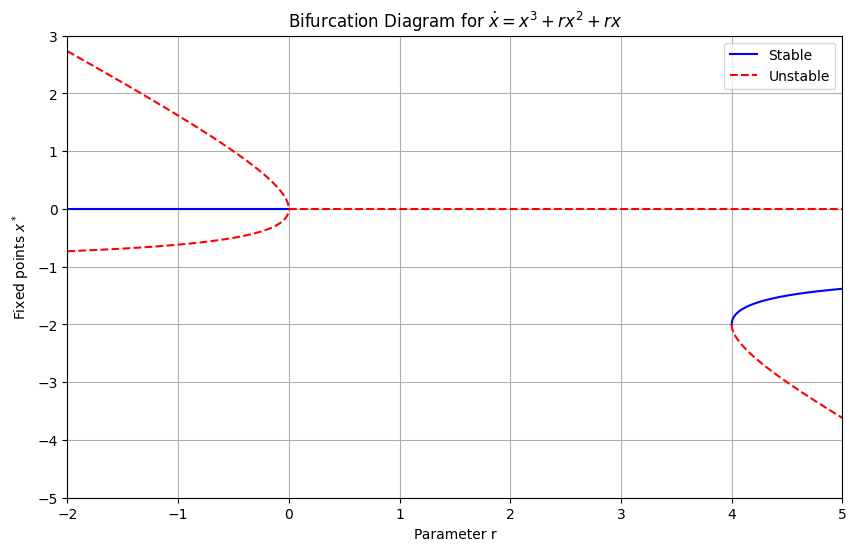

In [195]:
#Q4 b) Plotting the bifurcation diagram through code (The plot is analyse numerically with hand)

# Define the range for r
r_neg = np.linspace(-2, 0, 400)
r_pos = np.linspace(4, 5, 400)
r_full = np.linspace(-2, 5, 400)

# Fixed point x* = 0
x1_stable = np.zeros_like(r_neg)
x1_unstable = np.zeros_like(np.linspace(0, 5, 400))

# Fixed points x* = (-r +/- sqrt(r^2 - 4r)) / 2
# For r <= 0 (both are unstable)
x2_unstable_neg = (-r_neg + np.sqrt(r_neg**2 - 4*r_neg)) / 2
x3_unstable_neg = (-r_neg - np.sqrt(r_neg**2 - 4*r_neg)) / 2

# For r >= 4 (one stable, one unstable)
x2_stable_pos = (-r_pos + np.sqrt(r_pos**2 - 4*r_pos)) / 2
x3_unstable_pos = (-r_pos - np.sqrt(r_pos**2 - 4*r_pos)) / 2


# Plotting
plt.figure(figsize=(10, 6))

# Plot stable branches (solid lines)
plt.plot(r_neg, x1_stable, 'b-', label='Stable')
plt.plot(r_pos, x2_stable_pos, 'b-')

# Plot unstable branches (dashed lines)
plt.plot(np.linspace(0, 5, 400), x1_unstable, 'r--', label='Unstable')
plt.plot(r_neg, x2_unstable_neg, 'r--')
plt.plot(r_neg, x3_unstable_neg, 'r--')
plt.plot(r_pos, x3_unstable_pos, 'r--')

# Formatting
plt.title('Bifurcation Diagram for $\dot{x} = x^3 + rx^2 + rx$')
plt.xlabel('Parameter r')
plt.ylabel('Fixed points $x^*$')
plt.grid(True)
plt.ylim(-5, 3)
plt.xlim(-2, 5)
plt.legend()
plt.show()